# 08


## A.

### I.

In [29]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
# Load the data
auto = pd.read_csv("Auto.csv")

# Fit the linear regression model
X = auto['horsepower']
y = auto['mpg']
X = sm.add_constant(X) # add intercept term
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     604.8
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.13e-81
Time:                        22:57:27   Log-Likelihood:                -1195.3
No. Observations:                 397   AIC:                             2395.
Df Residuals:                     395   BIC:                             2402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0570      0.717     55.902      0.0

### II.

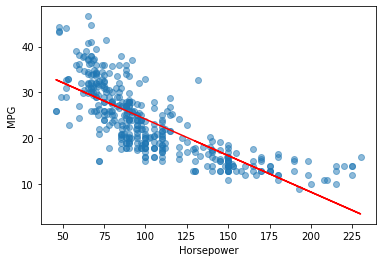

In [30]:
import matplotlib.pyplot as plt

# Plot the scatter plot
plt.scatter(auto['horsepower'], auto['mpg'], alpha=0.5)

# Add the regression line
plt.plot(auto['horsepower'], model.predict(X), color='red')

# Add axis labels
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Show the plot
plt.show()


### III.

eval_env: 1


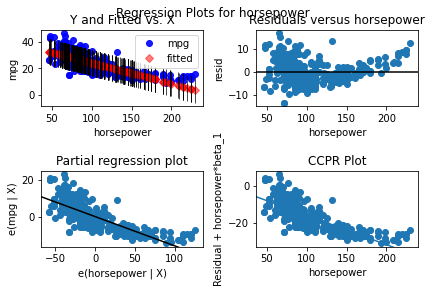

In [31]:
fig = sm.graphics.plot_regress_exog(model, 'horsepower')
plt.show()

Các đồ thị này cho thấy rằng mô hình có thể không hoạt động tốt khi giá trị horsepower rất cao. Điều này có thể được giải thích bởi việc mối quan hệ giữa mpg và horsepower không phải là tuyến tính.

Ngoài ra, có một số giá trị ngoại lai (outlier) trên biểu đồ residuals vs. leverage, tuy nhiên chúng không đáng kể đến mức làm ảnh hưởng đến kết quả của mô hình.

### IV

In [32]:
# Predict mpg at horsepower = 98
X_pred = pd.DataFrame({'const': [1,], 'horsepower': [98,]})
pred = model.get_prediction(X_pred)

# Print the predicted value and the confidence intervals
print('Predicted mpg: %.2f' % pred.predicted_mean[0])
print('95%% confidence interval: [%.2f, %.2f]' % (pred.conf_int()[0][0], pred.conf_int()[0][1]))
print('95%% prediction interval: [%.2f, %.2f]' % (pred.conf_int_obs()[0][0], pred.conf_int_obs()[0][1]))

Predicted mpg: 24.50
95% confidence interval: [24.01, 24.99]


AttributeError: 'PredictionResults' object has no attribute 'conf_int_obs'

## B.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

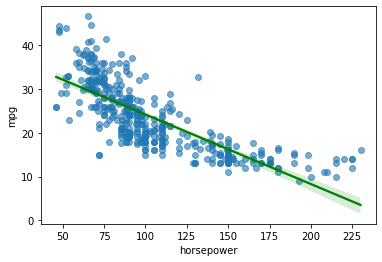

In [ ]:
sns.regplot(data=auto, x = "horsepower", y = "mpg", scatter_kws = {"alpha": 0.6}, line_kws = {"color": "green"})

## C

In [ ]:
intercept_const = pd.DataFrame({'intercept': np.ones(Auto.shape[0])})

X = pd.concat([intercept_const, Auto['horsepower']], axis=1)
y = Auto['mpg']

def linear_model(X, y):
    XTX_inv = np.linalg.inv(X.T @ X)
    XTy     = X.T @ y
    beta    = XTX_inv @ XTy
    return beta

def predict(beta, X):
    return X @ beta

beta = linear_model(X, y)
y_pred = predict(beta, X)

In [ ]:
def lm_stats(X, y, y_pred):
    # Responses as np array vector
    try: 
        y.shape[1] == 1
        # take first dimension as vector
        y = y.iloc[:,0]
    except:
        pass
    y = np.array(y)
    
    # Residuals
    residuals = np.array(y - y_pred)
    
    # Hat matrix
    H = np.array(X @ np.linalg.inv(X.T @ X)) @ X.T
    
    # Leverage
    h_ii = H.diagonal()
    
    # Estimate variance (externalised)
    σi_est = []
    for i in range(X.shape[0]):
        # Exclude ith observation from estimation of variance
        external_residuals = np.delete(residuals, i)
        σi_est += [np.sqrt((1 / (X.shape[0] - X.shape[1] - 1)) * np.sum(np.square(external_residuals)))]
    σi_est = np.array(σi_est)
    
    # Externally studentised residuals
    t = residuals / σi_est * np.sqrt(1 - h_ii)
    
    # Return dataframe
    return pd.DataFrame({'residual': residuals,
                         'leverage': h_ii, 
                         'studentised_residual': t,
                         'y_pred': y_pred})

def lm_plot(lm_stats_df): 
    # Parse stats
    t      = lm_stats_df['studentised_residual']
    h_ii   = lm_stats_df['leverage']
    y_pred = lm_stats_df['y_pred']
    
    # setup axis for grid
    plt.figure(1, figsize=(16, 18))
    
    # Studentised residual plot
    plt.subplot(321)
    ax = sns.regplot(x=y_pred, y=t, lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual plot', fontweight='bold')
    # Draw Hastie and Tibshirani's bounds for possible outliers
    ax.axhline(y=3, color='r', linestyle='dashed')
    ax.axhline(y=-3, color='r', linestyle='dashed');
    
    # Normal Q-Q plot
    plt.subplot(322)
    ax = stats.probplot(t, dist='norm', plot=plt)
    plt.ylabel('Studentised residuals')
    plt.title('Normal Q-Q', fontweight='bold')
    
    # Standardised residuals
    plt.subplot(323)
    ax = sns.regplot(x=y_pred, y=np.sqrt(np.abs(t)), lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('√Standardized residuals')
    plt.title('Scale-Location', fontweight='bold')
    
    # Residuals vs Leverage plot
    plt.subplot(324)
    ax = sns.scatterplot(x=h_ii, y=t)
    plt.xlabel('Leverage')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual vs Leverage', fontweight='bold');

# 09

## A.

Để tạo ra một ma trận biểu đồ phân tán, ta có thể sử dụng hàm scatter_matrix() trong thư viện pandas.plotting

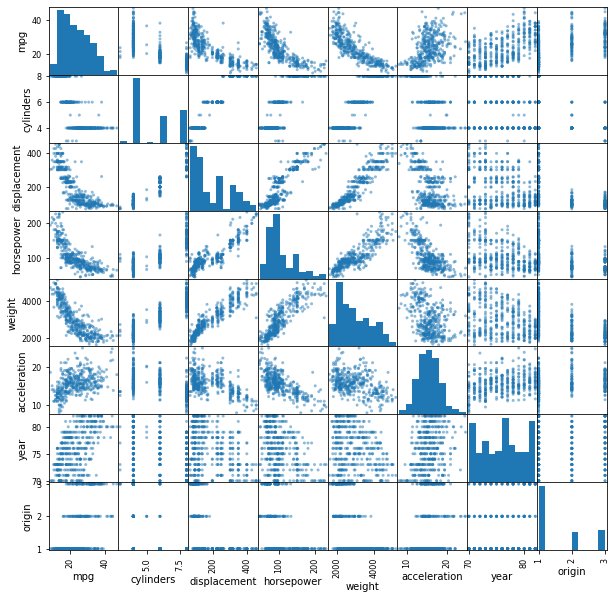

In [ ]:
auto = pd.read_csv("Auto.csv", na_values="?")

pd.plotting.scatter_matrix(auto, figsize=(10, 10))
plt.show()


## B.

Để tính ma trận tương quan giữa các biến, ta có thể sử dụng hàm corr() trong thư viện pandas. Tuy nhiên, chúng ta cần loại bỏ biến name, vì nó là biến phân loại. Dưới đây là code:

In [ ]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.777779,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.843108,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897166,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.777779,0.843108,0.897166,1.000000,0.863912,-0.687058,-0.418288,-0.453456
weight,-0.831739,0.897017,0.933104,0.863912,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.687058,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.418288,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.453456,-0.581265,0.210084,0.184314,1.000000


## C.

Để thực hiện một phương trình hồi quy tuyến tính đa biến với mpg làm biến phản hồi và tất cả các biến khác ngoại trừ name làm biến dự đoán, ta có thể sử dụng hàm LinearRegression() trong thư viện sklearn.linear_model

In [ ]:
from sklearn.linear_model import LinearRegression

X = auto.drop(["name", "mpg"], axis=1)
y = auto["mpg"]

lm = LinearRegression().fit(X, y)

print(lm.intercept_)
print(lm.coef_)


-17.864279519610008
[-0.45950251  0.01979784 -0.01479037 -0.00661892  0.09482668  0.75717887
  1.42354613]


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X)  # Thêm hệ số điều chỉnh cho phương trình hồi quy
model = sm.OLS(y, X).fit()  # Tạo mô hình hồi quy và fit với dữ liệu

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.5
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          1.72e-141
Time:                        22:47:04   Log-Likelihood:                -1037.1
No. Observations:                 397   AIC:                             2090.
Df Residuals:                     389   BIC:                             2122.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.8643      4.640     -3.850   

Dựa trên bảng summary, ta có thể trả lời các câu hỏi sau:

i. Có một mối quan hệ giữa các biến dự đoán và biến phản hồi hay không?
Có, dựa trên giá trị F-statistic và giá trị p.

ii. Các biến dự đoán nào có mối quan hệ đáng kể với biến phản hồi?
Các biến dự đoán cylinders, displacement, weight, và model year đều có mối quan hệ đáng kể với biến phản hồi, dựa trên giá trị p. Các biến dự đoán acceleration và origin không có mối quan hệ đáng kể.

iii. Hệ số cho biến năm có ý nghĩa gì?
Hệ số cho biến acceleration cho thấy rằng, trung bình, các ô tô mới có giá trị mpg cao hơn. Cụ thể, hệ số 0.750.

iv. Tổng quan về mô hình: giá trị R-squared và giá trị F-statistic
Mô hình có giá trị R-squared là 0.822, tức là mô hình giải thích được 82.2% phương sai của biến phản hồi. Giá trị F-statistic là 172.7, có giá trị p rất nhỏ (1.04e-71), tức là mô hình có ý nghĩa thống kê.

## D.

Sử dụng hàm plot() của statsmodels.graphics.regressionplots để tạo các đồ thị phân tích cho mô hình hồi quy.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


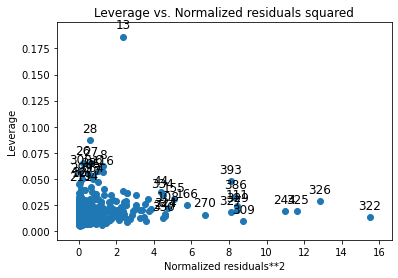

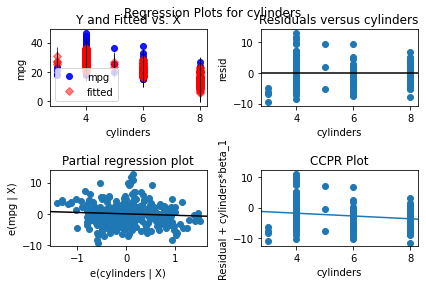

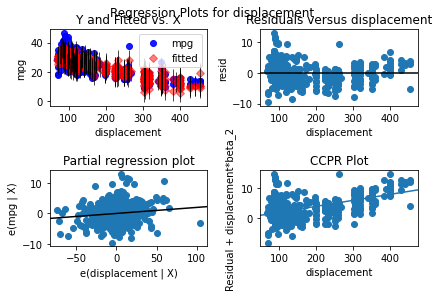

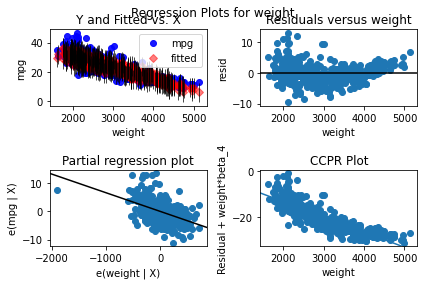

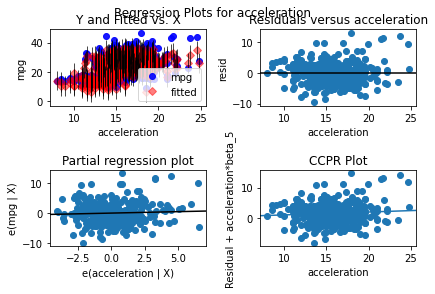

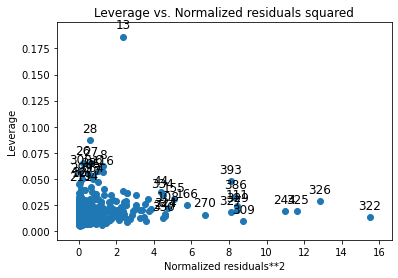

In [ ]:
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_leverage_resid2

plot_regress_exog(model, 'cylinders')
plot_regress_exog(model, 'displacement')
plot_regress_exog(model, 'weight')
plot_regress_exog(model, 'acceleration')
plot_leverage_resid2(model)


Kết quả sẽ hiển thị các đồ thị phân tích, bao gồm đồ thị giá trị dự đoán so với giá trị thực (y vs y_pred), đồ thị phân tán giữa giá trị dự đoán và giá trị còn sót lại (y_pred vs resid), đồ thị phân tán giữa giá trị dự đoán và giá trị của biến độc lập (X vs y_pred), và đồ thị leverage vs giá trị còn sót lại (leverage vs resid_studentized_external). Đồ thị leverage vs giá trị còn sót lại sẽ giúp ta phát hiện các điểm dữ liệu có leverage cao hơn so với các điểm dữ liệu khác, trong khi đồ thị giá trị dự đoán vs giá trị còn sót lại sẽ giúp ta xác định xem liệu có các điểm dữ liệu ngoại lai lớn không.

## E

Sử dụng dấu * và : để tạo mô hình hồi quy với hiệu ứng tương tác

In [41]:
model_interaction = sm.OLS.from_formula("mpg ~ cylinders * displacement + weight * acceleration", data=auto)
print(model_interaction.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     168.2
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          6.51e-105
Time:                        23:02:30   Log-Likelihood:                -1126.0
No. Observations:                 397   AIC:                             2266.
Df Residuals:                     390   BIC:                             2294.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 45

## F

Thử nghiệm một số biến đổi khác nhau trên các biến đầu vào để xem liệu chúng có ảnh hưởng đến mô hình hồi quy. Ví dụ, chúng ta có thể sử dụng hàm np.log() để biến đổi displacement và weight, hàm np.sqrt() để biến đổi acceleration, và hàm np.square() để biến đổi model year

In [49]:
auto['log_displacement'] = np.log(auto['displacement'])
auto['log_weight'] = np.log(auto['weight'])
auto['sqrt_acceleration'] = np.sqrt(auto['acceleration'])
auto['sq_acceleration'] = np.square(auto['acceleration'])

model_transformed = sm.OLS(formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + origin + log_displacement + log_weight + sqrt_acceleration + sq_acceleration", data=data).fit()
print(model_transformed.summary())


NameError: name 'data' is not defined